# **TUGAS**

Noted :
Target Besok Sore Jam 3

# 1. Pengumpulan data

1. Gunakan function `generate_random_names` untuk membuat **1000** nama secara acak (Ok)
2. Dari nama-nama yang telah dibuat, dapatkan informasi sebagai berikut
    - gender : jenis kelamin (m/f)
    - total_word : jumlah kata dalam nama
    - total_char : jumlah karakter dalam nama (termasuk spasi)
    - first_name : nama depan
    - mid_name : nama tengah (isi `None` jika tidak memiliki nama tengah)
    - last_name : nama belakang (isi `None` jika tidak memiliki nama belakang)
3. Urutkan nama berdasarkan urutan alfabetis dari a ke z ( Ok )
4. Simpan data-data berikut kedalam csv dengan nama file `names.csv` (ok)
5. Contoh hasil penyimpanan data bisa dilihat pada file `sample_names.csv` (ok)

In [1]:
import requests
import random
import re

def generate_random_names():
    def randomize_params():
        # initiate params
        params = {
            'gender': 'm' if random.random() < 0.67 else 'f',
            'number': 3 if random.random() < 0.75 else 2 if random.random() < 0.95 else 1,
            'sets': random.randint(1,5),
            'surname': '',
            'usage_ins': 2
        }

        return params

    def request_to_api(params:dict):
        # send request
        response = requests.get('https://www.behindthename.com/random/random.php', params=params)
        if response.status_code != 200:
            return None
        
        return response
    
    def parse_response(response):
        # decode html page to string
        result_html = response.content.decode()

        # get results division starting index
        divs_start = [i.start() for i in re.finditer('<div class="random-results">', result_html)]

        # iterate all results division
        result_names = []
        for div_start in divs_start:
            # get result division
            div_end = result_html[div_start:].find('</div>')
            division = result_html[div_start:div_start+div_end]

            # split result per word
            random_results = division.split('</a>')

            # get clean result
            random_names = []
            for random_result in random_results[:-1]:
                random_name = random_result[random_result.find('class="plain">'):].replace('class="plain">','')
                random_names.append(random_name)
            result_name = ' '.join(random_names)

            # add result
            result_names.append(result_name)

        return result_names
    
    params = randomize_params()
    response = request_to_api(params)
    results = parse_response(response)

    return [{'name':result, 'gender':params['gender']} for result in results]

In [2]:
import pandas as pd
import numpy as np

In [3]:
n = range(1000+1)
j = []
for a in n:
    j.extend(generate_random_names())
    nam = j 

In [4]:
df = pd.DataFrame(nam)
df["total_word"] = df['name'].str.split().str.len()
df["total_char"] = df['name'].str.len()
df["first_name"] = df['name'].str.split().str[0]
df["mid_name"] = df['name'].str.split().str[1]
df["last_name"] = df['name'].str.split().str[2].fillna(np.nan)



display(df)

,name,gender,total_word,total_char,first_name,mid_name,last_name
0,Bima Aditya Slamet,m,3,18,Bima,Aditya,Slamet
1,Usman Faisal Cahya,m,3,18,Usman,Faisal,Cahya
2,Wahyu Ilham,m,2,11,Wahyu,Ilham,NaN
3,Dwi Wira,m,2,8,Dwi,Wira,NaN
4,Wahyu Iman,m,2,10,Wahyu,Iman,NaN
...,...,...,...,...,...,...,...
1010,Qdcqsts Zqdu,m,2,12,Qdcqsts,Zqdu,NaN
1011,Usokbe Gomxoc,m,2,13,Usokbe,Gomxoc,NaN
1012,Aempjah Ebfmvju,f,2,15,Aempjah,Ebfmvju,NaN
1013,Mjesdp Ecdih,m,2,12,Mjesdp,Ecdih,NaN


In [1]:
df.sort_values(by= ['name'], ascending= True, inplace= True)
display(df)
# print(final_df)

NameError: name 'df' is not defined

In [6]:
# final_df.drop(columns=0,inplace= True)
# df.drop(df.columns[[0]], axis=1, inplace=True)
df.reset_index(drop= True, inplace= True)
display(df)

,name,gender,total_word,total_char,first_name,mid_name,last_name
0,Abgpws Unjy,m,2,11,Abgpws,Unjy,NaN
1,Abptu Xmapbed,f,2,13,Abptu,Xmapbed,NaN
2,Abtna Pcgu,m,2,10,Abtna,Pcgu,NaN
3,Acq Voiv,f,2,8,Acq,Voiv,NaN
4,Acsg Dnrk,m,2,9,Acsg,Dnrk,NaN
...,...,...,...,...,...,...,...
1010,Zxv Xtuss,m,2,9,Zxv,Xtuss,NaN
1011,Zyjr Cqdyrdf,f,2,12,Zyjr,Cqdyrdf,NaN
1012,Zzb Zavqlj,f,2,10,Zzb,Zavqlj,NaN
1013,Zzemb Swey,f,2,10,Zzemb,Swey,NaN


In [7]:
# # df_reset.drop("-", axis=1, inplace= True)
# df_reset.fillna(np.nan,inplace=True) 
display(df)
df.to_csv("names_new.csv", index= False)

,name,gender,total_word,total_char,first_name,mid_name,last_name
0,Abgpws Unjy,m,2,11,Abgpws,Unjy,NaN
1,Abptu Xmapbed,f,2,13,Abptu,Xmapbed,NaN
2,Abtna Pcgu,m,2,10,Abtna,Pcgu,NaN
3,Acq Voiv,f,2,8,Acq,Voiv,NaN
4,Acsg Dnrk,m,2,9,Acsg,Dnrk,NaN
...,...,...,...,...,...,...,...
1010,Zxv Xtuss,m,2,9,Zxv,Xtuss,NaN
1011,Zyjr Cqdyrdf,f,2,12,Zyjr,Cqdyrdf,NaN
1012,Zzb Zavqlj,f,2,10,Zzb,Zavqlj,NaN
1013,Zzemb Swey,f,2,10,Zzemb,Swey,NaN


# 2. Pengolahan data

1. Buka data yang sudah dikumpulan pada soal nomor 1
2. Berdasarkan data tersebut, cari tahu:
    - nama terpanjang
    - nama terpendek
    - nama terpopuler untuk laki-laki (rangkaian nama, misal : Amir Mahmud Tirto)
    - nama terpopuler untuk laki-laki (satu kata : Mahmud)
    - nama terpopuler untuk perempuan (rangkaian nama, misal : Annisa Sri Putri)
    - nama terpopuler untuk perempuan (satu kata : Putri)
    - huruf pertama yang paling sering dipakai dalam nama
3. Buat grafik tentang:
    - perbandingan jumlah laki-laki dan perempuan
    - perbandingan nama yang memiliki satu, dua, dan tiga kata
    - jumlah nama terhadap huruf pertamanya

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("names.csv")

In [3]:
# Nama Terpanjang
df.sort_values(by= ['total_char'], ascending= False, inplace= True)
display("Nama Terpanjang" ,df)

'Nama Terpanjang'

,name,gender,total_word,total_char,first_name,mid_name,last_name
701,Rxruzbt Pbuxhok,f,2,15,Rxruzbt,Pbuxhok,NaN
807,Uvhhevi Wxpevwh,f,2,15,Uvhhevi,Wxpevwh,NaN
166,Ejgnygt Arpulah,m,2,15,Ejgnygt,Arpulah,NaN
96,Cluabat Qnipqxq,f,2,15,Cluabat,Qnipqxq,NaN
556,Nylqdea Idwkxkz,f,2,15,Nylqdea,Idwkxkz,NaN
...,...,...,...,...,...,...,...
535,Nni Eyy,m,2,7,Nni,Eyy,NaN
222,Fse Rgj,m,2,7,Fse,Rgj,NaN
721,Skt Uth,m,2,7,Skt,Uth,NaN
555,Nxs Pma,f,2,7,Nxs,Pma,NaN


In [4]:
# Nama Terpendek
df.sort_values(by= ['total_char'], ascending= True, inplace= True)
display("Nama Terpendek" ,df)

'Nama Terpendek'

,name,gender,total_word,total_char,first_name,mid_name,last_name
790,Ukl Ogf,m,2,7,Ukl,Ogf,NaN
653,Quv Kwn,f,2,7,Quv,Kwn,NaN
847,Wac Imt,m,2,7,Wac,Imt,NaN
643,Qpb Zhk,m,2,7,Qpb,Zhk,NaN
845,Vzl Dkb,m,2,7,Vzl,Dkb,NaN
...,...,...,...,...,...,...,...
761,Tpljknp Zjhiwkx,f,2,15,Tpljknp,Zjhiwkx,NaN
753,Tjbirlc Fldhybx,f,2,15,Tjbirlc,Fldhybx,NaN
344,Iyuxudl Bozvmtt,f,2,15,Iyuxudl,Bozvmtt,NaN
532,Nmuytfc Vznyzjg,m,2,15,Nmuytfc,Vznyzjg,NaN


In [5]:
# Nama Popular Laki-Laki Rangkaian Nama
df[df['name'] == 'Vzl Dkb']

,name,gender,total_word,total_char,first_name,mid_name,last_name
845,Vzl Dkb,m,2,7,Vzl,Dkb,NaN


In [6]:
# Nama Popular Laki-Laki Satu Kata
df[df['name'].str.split().str.get(0) == 'Vzl']

,name,gender,total_word,total_char,first_name,mid_name,last_name
845,Vzl Dkb,m,2,7,Vzl,Dkb,NaN


In [7]:
# Nama Popular Perempuan Rangkaian Nama
df[df['name'] == 'Mhey Zylphpc']

,name,gender,total_word,total_char,first_name,mid_name,last_name
491,Mhey Zylphpc,f,2,12,Mhey,Zylphpc,NaN


In [8]:
# Nama Popular perempuan Satu Kata
df[df['name'].str.split().str.get(0) == 'Mhey']

,name,gender,total_word,total_char,first_name,mid_name,last_name
491,Mhey Zylphpc,f,2,12,Mhey,Zylphpc,NaN


In [9]:
#  Huruf pertama yang paling sering dipakai dalam nama, Cara 1
data_1 = df[df['name'].str.get(0) == "A"]
data_1 = data_1.reset_index()
data_1

,index,name,gender,total_word,total_char,first_name,mid_name,last_name
0,9,Ahb Kxn,f,2,7,Ahb,Kxn,NaN
1,28,Asn Tlk,f,2,7,Asn,Tlk,NaN
2,31,Awl Petw,m,2,8,Awl,Petw,NaN
3,34,Ayg Bpyc,f,2,8,Ayg,Bpyc,NaN
4,7,Agd Khgr,f,2,8,Agd,Khgr,NaN
5,3,Adh Gdtb,m,2,8,Adh,Gdtb,NaN
6,38,Ayub Cipu,f,2,9,Ayub,Cipu,NaN
7,6,Aft Zeugb,f,2,9,Aft,Zeugb,NaN
8,2,Act Qqbty,f,2,9,Act,Qqbty,NaN
9,8,Agxep Yhn,m,2,9,Agxep,Yhn,NaN


In [42]:
#  Huruf pertama yang paling sering dipakai dalam nama, Cara 2
df['name'].mode()

# dnams= df['name'].value_counts()
# display(dnams)

0        Aattj Exltfw
1         Acr Wvzhbvs
2           Act Qqbty
3            Adh Gdtb
4         Afdb Ddcynk
            ...      
996     Zxqbq Yexxkmy
997          Zxqh Bpe
998         Zzc Ggglp
999       Zzc Jkwspgb
1000        Zzzpr Skz
Name: name, Length: 1001, dtype: object

In [11]:
import matplotlib.pyplot as plt

In [12]:
df.groupby('gender').first()
male_count = df[df.gender == 'm'].gender.count()
female_count = df[df.gender == 'f'].gender.count()
display(male_count)
display(female_count)

660

341

<Axes: >

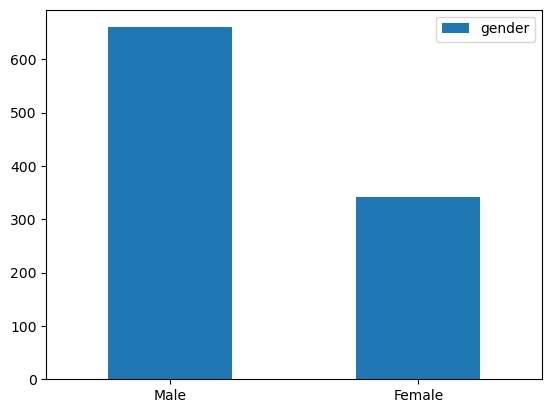

In [13]:
# Gender Graphic
plotdata = pd.DataFrame(
    {"gender": [660, 341]}, 
    index=["Male", "Female"])
# Plot a bar chart
plotdata.plot(kind="bar", rot= 0)

<Axes: title={'center': 'Gender'}, xlabel='gender'>

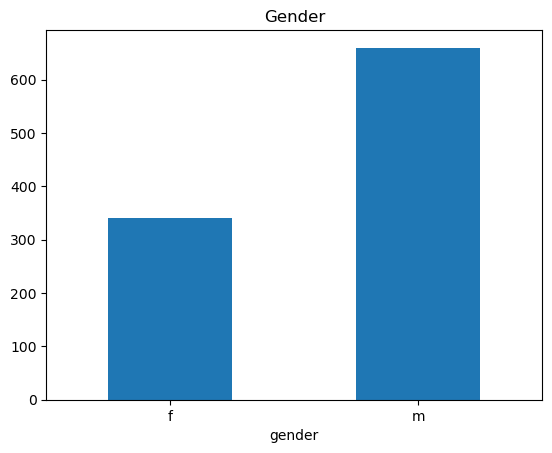

In [14]:
# Cara Kedua Gender
df.groupby('gender').size().plot(kind='bar', title = 'Gender', rot = 0)

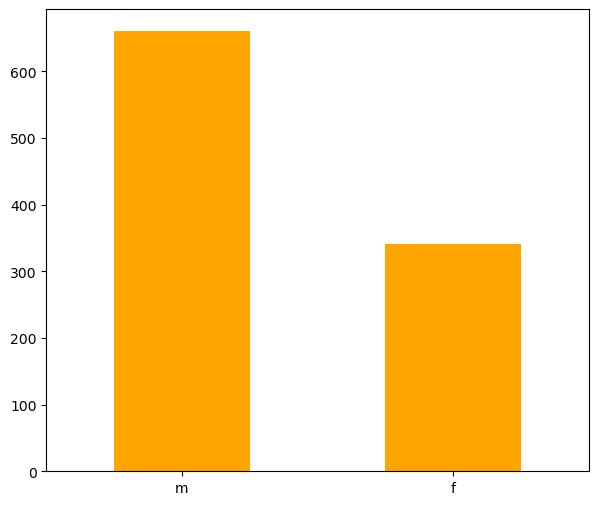

m    660
f    341
Name: gender, dtype: int64


In [15]:
#  Cara Ketiga 

data_gender = df['gender'].str[0].value_counts()
plt.figure(figsize=(7,6))
data_gender.plot(kind='bar', rot=0, color='orange')
plt.show()

print(data_gender)

In [16]:
# 
df.groupby('total_word').first()
oneword_count = df[df.total_word == 1].total_word.count()
twoword_count = df[df.total_word == 2].total_word.count()
threeword_count = df[df.total_word == 3].total_word.count()
display(oneword_count, twoword_count, threeword_count)

0

1001

0

<Axes: >

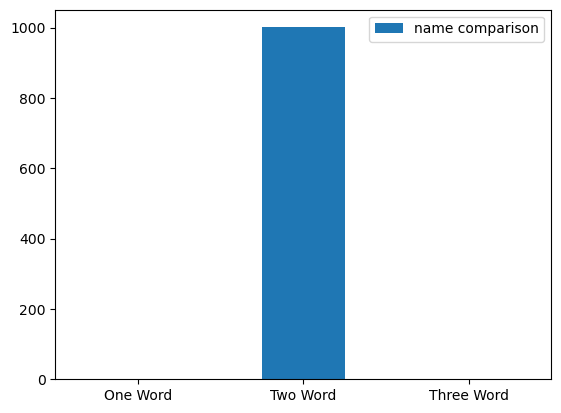

In [17]:
# One,Two,Three Word Count Graphic
plotdata = pd.DataFrame(
    {"name comparison": [0, 1001, 0]}, 
    index=["One Word", "Two Word", "Three Word"])
# Plot a bar chart
plotdata.plot(kind="bar", rot= 0)

<Axes: title={'center': 'Name Comparison'}, xlabel='total_word'>

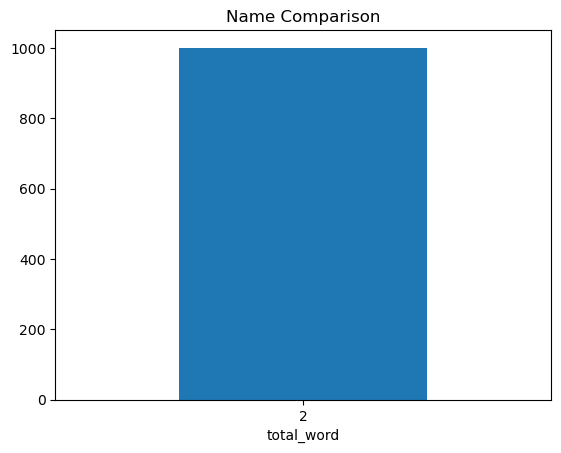

In [18]:
# Cara Kedua One, Two, Three Word Count
df.groupby('total_word').size().plot(kind='bar', title = 'Name Comparison', rot = 0)

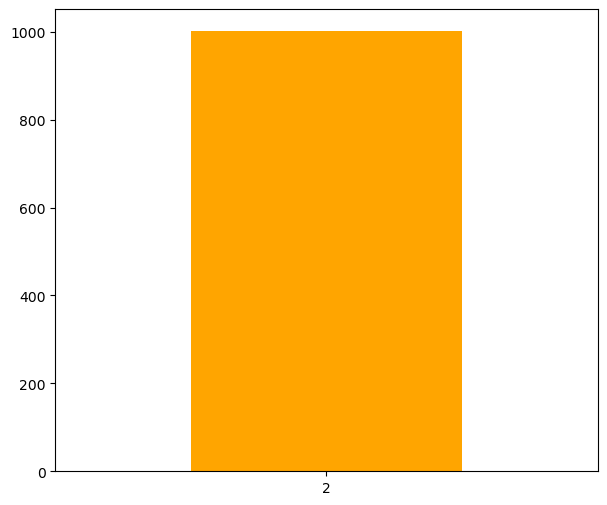

2    1001
Name: total_word, dtype: int64


In [19]:
# Cara Ketiga One, Two, Three Word Count
data_word_count = df['total_word'].value_counts()
plt.figure(figsize=(7,6))
data_word_count.plot(kind='bar', rot=0, color='orange')
plt.show()

print(data_word_count)

In [20]:
# Cek apakah benar kode yang diambil berdasarkan huruf untuk menghitung jumlah nama
a_count = df[df['name'].str.get(0) == "Z"]
display(a_count)

,name,gender,total_word,total_char,first_name,mid_name,last_name
991,Ztz Bhq,m,2,7,Ztz,Bhq,NaN
972,Zkd Ivib,m,2,8,Zkd,Ivib,NaN
968,Zhlp Eqq,m,2,8,Zhlp,Eqq,NaN
981,Zmyd Qbe,m,2,8,Zmyd,Qbe,NaN
997,Zxqh Bpe,m,2,8,Zxqh,Bpe,NaN
962,Zfgnm Glf,m,2,9,Zfgnm,Glf,NaN
998,Zzc Ggglp,m,2,9,Zzc,Ggglp,NaN
975,Zkwpm Lac,m,2,9,Zkwpm,Lac,NaN
976,Zlsrb Jjc,m,2,9,Zlsrb,Jjc,NaN
989,Zry Kjacq,m,2,9,Zry,Kjacq,NaN


In [21]:
# Jumlah Nama Terhadap Huruf Pertamanya
data_4= df.groupby('name').first()
a_count = df[df['name'].str.get(0) == "A"].name.count()
b_count = df[df['name'].str.get(0) == "B"].name.count()
c_count = df[df['name'].str.get(0) == "C"].name.count()
d_count = df[df['name'].str.get(0) == "D"].name.count()
e_count = df[df['name'].str.get(0) == "E"].name.count()
f_count = df[df['name'].str.get(0) == "F"].name.count()
g_count = df[df['name'].str.get(0) == "G"].name.count()
h_count = df[df['name'].str.get(0) == "H"].name.count()
i_count = df[df['name'].str.get(0) == "I"].name.count()
j_count = df[df['name'].str.get(0) == "J"].name.count()
k_count = df[df['name'].str.get(0) == "K"].name.count()
l_count = df[df['name'].str.get(0) == "L"].name.count()
m_count = df[df['name'].str.get(0) == "M"].name.count()
n_count = df[df['name'].str.get(0) == "N"].name.count()
o_count = df[df['name'].str.get(0) == "O"].name.count()
p_count = df[df['name'].str.get(0) == "P"].name.count()
q_count = df[df['name'].str.get(0) == "Q"].name.count()
r_count = df[df['name'].str.get(0) == "R"].name.count()
s_count = df[df['name'].str.get(0) == "S"].name.count()
t_count = df[df['name'].str.get(0) == "T"].name.count()
u_count = df[df['name'].str.get(0) == "U"].name.count()
v_count = df[df['name'].str.get(0) == "V"].name.count()
w_count = df[df['name'].str.get(0) == "W"].name.count()
x_count = df[df['name'].str.get(0) == "X"].name.count()
y_count = df[df['name'].str.get(0) == "Y"].name.count()
z_count = df[df['name'].str.get(0) == "Z"].name.count()
# display(a_count,b_count,c_count,d_count,e_count,f_count,g_count, h_count,i)
print(data_4, "A Count", a_count, "B Count", b_count, "C Count", c_count, 
        "D Count", d_count, "E Count", e_count, "F Count", f_count, "G Count", g_count,
        "H Count", h_count, "I Count", i_count, "J count", j_count, "K count", k_count,
        "L Count", l_count, "M Count", m_count, "N Count", n_count, "O Count", o_count,
        "P Count", p_count, "Q Count", q_count, "R Count", r_count, "S Count", s_count,
        "T Count", t_count, "U Count", u_count, "V Count", v_count, "W Count", w_count,
        "X Count", x_count, "Y Count", y_count, "Z Count", z_count)

              gender  total_word  total_char first_name mid_name  last_name
name                                                                       
Aattj Exltfw       m           2          12      Aattj   Exltfw        NaN
Acr Wvzhbvs        m           2          11        Acr  Wvzhbvs        NaN
Act Qqbty          f           2           9        Act    Qqbty        NaN
Adh Gdtb           m           2           8        Adh     Gdtb        NaN
Afdb Ddcynk        m           2          11       Afdb   Ddcynk        NaN
...              ...         ...         ...        ...      ...        ...
Zxqbq Yexxkmy      f           2          13      Zxqbq  Yexxkmy        NaN
Zxqh Bpe           m           2           8       Zxqh      Bpe        NaN
Zzc Ggglp          m           2           9        Zzc    Ggglp        NaN
Zzc Jkwspgb        f           2          11        Zzc  Jkwspgb        NaN
Zzzpr Skz          m           2           9      Zzzpr      Skz        NaN

[1001 rows 

In [22]:
# Check apakah benar data yang dihitung berjumlah sebesar 1001
total_count = a_count + b_count + c_count + d_count + e_count + f_count + g_count + h_count + i_count + j_count + k_count + l_count + m_count + n_count + o_count + p_count + q_count + r_count + s_count + t_count + u_count + v_count + w_count + x_count + y_count + z_count
print(total_count)

1001


 Selesai 


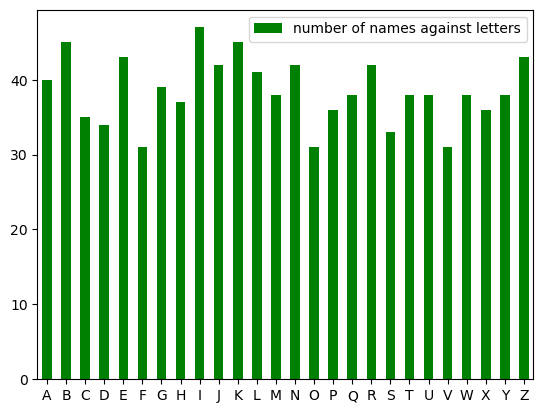

In [26]:
# Cara Pertama Grafik Jumlah nama berdasarkan huruf pada dataframe
plotdata = pd.DataFrame(
    {"number of names against letters": [40, 45, 35, 34, 43, 31, 39, 37, 47, 42, 45, 41, 38, 42, 31, 36, 38, 42, 33, 38, 38, 31, 38, 36, 38, 43]}, 
    index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])

# Plot a bar chart
plotdata.plot(
    kind= 'bar', layout=(2,10), rot= 0, color= ('g')
)

plotdata
print(" Selesai ")

 Selesai 


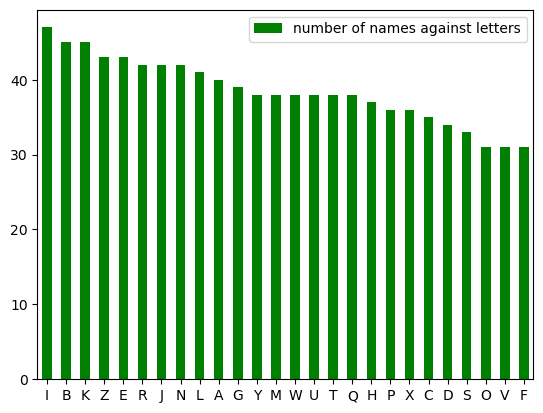

In [27]:
# Cara Kedua Grafik Jumlah nama berdasarkan huruf pada dataframe
plotdata = pd.DataFrame(
    {"number of names against letters": [40, 45, 35, 34, 43, 31, 39, 37, 47, 42, 45, 41, 38, 42, 31, 36, 38, 42, 33, 38, 38, 31, 38, 36, 38, 43]}, 
    index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])

# Plot a bar chart
plotdata.sort_values(by="number of names against letters", ascending= False).plot(
    kind= 'bar', layout=(2,10), rot= 0, color= ('g')
)

plotdata
print(" Selesai ")

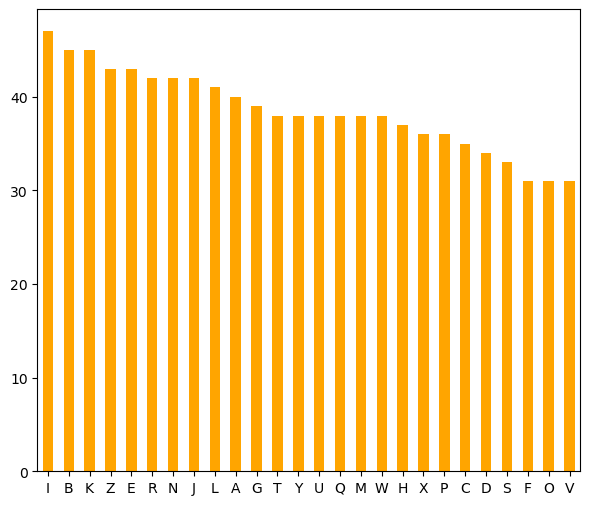

I    47
B    45
K    45
Z    43
E    43
R    42
N    42
J    42
L    41
A    40
G    39
T    38
Y    38
U    38
Q    38
M    38
W    38
H    37
X    36
P    36
C    35
D    34
S    33
F    31
O    31
V    31
Name: name, dtype: int64


In [28]:
data_names_letters = df['name'].str[0].value_counts()
plt.figure(figsize=(7,6))
data_names_letters.plot(kind='bar', rot=0, color='orange')
plt.show()

print(data_names_letters)

In [ ]:
x = list(df.iloc[:, 0])
y = list(df.iloc[:, 1])

# Plot the data using bar () method
plt.bar (X, Y, color="g")
ok